In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



#import os
#for dirname, _, filenames in os.walk(''):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
import os
os.chdir('gdrive/My Drive/Colab Notebooks')

In [0]:
!ls

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
tf.__version__
from tensorflow.python.client import device_lib
device_lib.list_local_devices()
#import tf_sentencepiece as tfs
#import sentencepiece as sp
import time
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from numpy.random import shuffle

init_notebook_mode(connected=True)


In [0]:
import os, sys

from keras.models import Model
from keras.layers import Input, LSTM, GRU, Dense, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
BATCH_SIZE = 64
EPOCHS = 20
LSTM_NODES =256
NUM_SENTENCES = 20000
MAX_SENTENCE_LENGTH = 50
MAX_NUM_WORDS = 20000
EMBEDDING_SIZE = 100

In [0]:
input_sentences = []
output_sentences = []
output_sentences_inputs = []

count = 0
for line in open(r'./urd.txt', encoding="utf-8"):
    count += 1

    if count > NUM_SENTENCES:
        break

    if '\t' not in line:
        continue

    input_sentence, output,garbage = line.rstrip().split('\t')

    output_sentence = output + ' <eos>'
    output_sentence_input = '<sos> ' + output

    input_sentences.append(input_sentence)
    output_sentences.append(output_sentence)
    output_sentences_inputs.append(output_sentence_input)

print("num samples input:", len(input_sentences))
print("num samples output:", len(output_sentences))
print("num samples output input:", len(output_sentences_inputs))

num samples input: 1167
num samples output: 1167
num samples output input: 1167


In [0]:
print(input_sentence)

When you meet someone for the first time, be careful about how close you stand to that person.


In [0]:
print(output_sentence)

جب تم پہلی دفعہ کسی سے ملو، اس بات کو مد نظر رکھو کہ تم اس کے کتنا قریب کھڑے ہو۔ <eos>


In [0]:
input_tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
input_tokenizer.fit_on_texts(input_sentences)
input_integer_seq = input_tokenizer.texts_to_sequences(input_sentences)

word2idx_inputs = input_tokenizer.word_index
print('Total unique words in the input: %s' % len(word2idx_inputs))

max_input_len = max(len(sen) for sen in input_integer_seq)
print("Length of longest sentence in input: %g" % max_input_len)

Total unique words in the input: 1341
Length of longest sentence in input: 18


In [0]:
output_tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, filters='')
output_tokenizer.fit_on_texts(output_sentences + output_sentences_inputs)
output_integer_seq = output_tokenizer.texts_to_sequences(output_sentences)
output_input_integer_seq = output_tokenizer.texts_to_sequences(output_sentences_inputs)

word2idx_outputs = output_tokenizer.word_index
print('Total unique words in the output: %s' % len(word2idx_outputs))

num_words_output = len(word2idx_outputs) + 1
max_out_len = max(len(sen) for sen in output_integer_seq)
print("Length of longest sentence in the output: %g" % max_out_len)

Total unique words in the output: 1722
Length of longest sentence in the output: 22


In [0]:
encoder_input_sequences = pad_sequences(input_integer_seq, maxlen=max_input_len)
print("encoder_input_sequences.shape:", encoder_input_sequences.shape)
print("encoder_input_sequences[150]:", encoder_input_sequences[150])

encoder_input_sequences.shape: (1167, 18)
encoder_input_sequences[150]: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   4 122 487  59]


In [0]:
print(input_sentences[150])
print(output_sentences[150])

You may sit here.
تم یہاں بیٹھ سکتے ہو۔ <eos>


In [0]:
print(word2idx_inputs['you'])
print(word2idx_inputs['sit'])

4
487


In [0]:
decoder_input_sequences = pad_sequences(output_input_integer_seq, maxlen=max_out_len, padding='post')
print("decoder_input_sequences.shape:", decoder_input_sequences.shape)
print("decoder_input_sequences[150]:", decoder_input_sequences[150])

decoder_input_sequences.shape: (1167, 22)
decoder_input_sequences[150]: [  2  15  77 564  65  54   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0]


In [0]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open(r'./glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

In [0]:
num_words = min(MAX_NUM_WORDS, len(word2idx_inputs) + 1)
embedding_matrix = zeros((num_words, EMBEDDING_SIZE))
for word, index in word2idx_inputs.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [0]:
print(embeddings_dictionary["you"])
print(embeddings_dictionary["sit"])

[-0.49886    0.76602    0.89751   -0.78547   -0.6855     0.62609
 -0.39655    0.34913    0.33334   -0.45233    0.61223    0.075948
  0.22531    0.16365    0.28095   -0.24758    0.0099009  0.71108
 -0.75859    0.87423    0.0031041  0.35796   -0.35233   -0.665
  0.38447    0.62677   -0.51543   -0.96653    0.61517   -0.75455
 -0.012359   1.1188     0.35719    0.0071769  0.20255    0.5011
 -0.44046    0.10661    0.79391   -0.80948   -0.015601  -0.22888
 -0.34198   -1.0065    -0.8763     0.15165   -0.085339  -0.6465
 -0.16733   -1.4499    -0.0065905  0.0048113 -0.012445   1.0474
 -0.19381   -2.5991     0.40528    0.43803    1.9332     0.45814
 -0.048819   1.4308    -0.78639   -0.20792    1.09       0.24816
  1.1487     0.51481   -0.21832   -0.4572     0.13888   -0.26369
  0.13647   -0.60539    0.099586   0.23344    0.13647   -0.1846
 -0.047734  -0.18392    0.52719   -0.2885    -1.0742    -0.0467
 -1.8302    -0.21197    0.0298    -0.30964   -0.43386   -0.36463
 -0.32738   -0.0093427  0.47205

In [0]:
embedding_layer = Embedding(num_words, EMBEDDING_SIZE, weights=[embedding_matrix], input_length=max_input_len)

In [0]:
decoder_targets_one_hot = np.zeros((
        len(input_sentences),
        max_out_len,
        num_words_output
    ),
    dtype='float32'
)

In [0]:
#(number of inputs, length of the output sentence, the number of words in the output)
decoder_targets_one_hot.shape

(1167, 22, 1723)

In [0]:
for i, d in enumerate(decoder_input_sequences):
    for t, word in enumerate(d):
        decoder_targets_one_hot[i, t, word] = 1

In [0]:
encoder_inputs_placeholder = Input(shape=(max_input_len,))
x = embedding_layer(encoder_inputs_placeholder)
encoder = LSTM(LSTM_NODES, return_state=True)

encoder_outputs, h, c = encoder(x)
encoder_states = [h, c]

In [0]:
decoder_inputs_placeholder = Input(shape=(max_out_len,))

decoder_embedding = Embedding(num_words_output, LSTM_NODES)
decoder_inputs_x = decoder_embedding(decoder_inputs_placeholder)

decoder_lstm = LSTM(LSTM_NODES, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs_x, initial_state=encoder_states)

In [0]:
decoder_dense = Dense(num_words_output, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [0]:
model = Model([encoder_inputs_placeholder,
  decoder_inputs_placeholder], decoder_outputs)
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

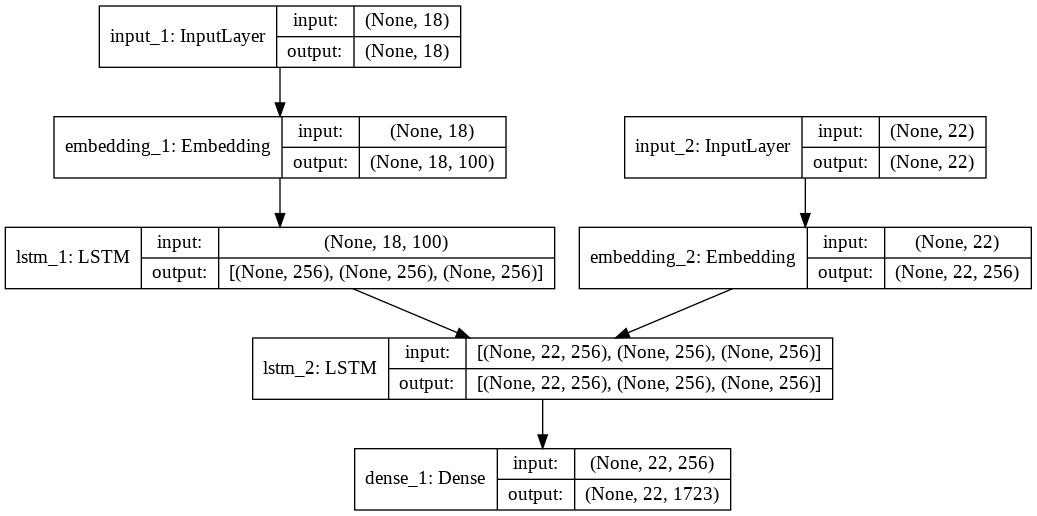

In [0]:
#from keras.utils import plot_model
#plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [0]:
r = model.fit(
    [encoder_input_sequences, decoder_input_sequences],
    decoder_targets_one_hot,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=0.1,
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1050 samples, validate on 117 samples
Epoch 1/20
1050/1050 [==============================] - 11s 10ms/step - loss: 3.2336 - acc: 0.6443 - val_loss: 3.7335 - val_acc: 0.4650
Epoch 2/20
1050/1050 [==============================] - 9s 8ms/step - loss: 2.0506 - acc: 0.6895 - val_loss: 3.7319 - val_acc: 0.4713
Epoch 3/20
1050/1050 [==============================] - 9s 8ms/step - loss: 1.9156 - acc: 0.6926 - val_loss: 3.5508 - val_acc: 0.4767
Epoch 4/20
1050/1050 [==============================] - 9s 8ms/step - loss: 1.8279 - acc: 0.7001 - val_loss: 3.5844 - val_acc: 0.4821
Epoch 5/20
1050/1050 [==============================] - 9s 8ms/step - loss: 1.7514 - acc: 0.7101 - val_loss: 3.4638 - val_acc: 0.4961
Epoch 6/20
1050/1050 [==============================] - 9s 8ms/step - loss: 1.6765 - acc: 0.7271 - val_loss: 3.4251 - val_acc: 0.5183
Epoch 7/20
1050/1050 [=============================

In [0]:
encoder_model = Model(encoder_inputs_placeholder, encoder_states)

In [0]:
decoder_state_input_h = Input(shape=(LSTM_NODES,))
decoder_state_input_c = Input(shape=(LSTM_NODES,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

In [0]:
decoder_inputs_single = Input(shape=(1,))
decoder_inputs_single_x = decoder_embedding(decoder_inputs_single)

In [0]:
decoder_outputs, h, c = decoder_lstm(decoder_inputs_single_x, initial_state=decoder_states_inputs)

In [0]:
decoder_states = [h, c]
decoder_outputs = decoder_dense(decoder_outputs)

In [0]:
decoder_model = Model(
    [decoder_inputs_single] + decoder_states_inputs,
    [decoder_outputs] + decoder_states
)

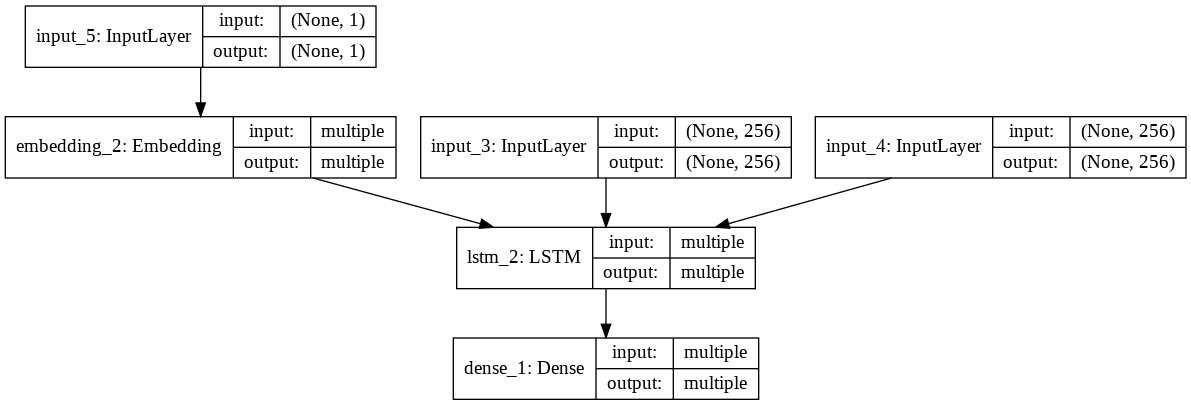

In [0]:
#from keras.utils import plot_model
#plot_model(decoder_model, to_file='model_plot_dec.png', show_shapes=True, show_layer_names=True)

In [0]:
idx2word_input = {v:k for k, v in word2idx_inputs.items()}
idx2word_target = {v:k for k, v in word2idx_outputs.items()}

In [0]:
def translate_sentence(input_seq):
    states_value = encoder_model.predict(input_seq)
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = word2idx_outputs['<sos>']
    eos = word2idx_outputs['<eos>']
    output_sentence = []

    for _ in range(max_out_len):
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        idx = np.argmax(output_tokens[0, 0, :])

        if eos == idx:
            break

        word = ''

        if idx > 0:
            word = idx2word_target[idx]
            output_sentence.append(word)

        target_seq[0, 0] = idx
        states_value = [h, c]

    return ' '.join(output_sentence)

In [0]:
i = np.random.choice(len(input_sentences))
input_seq = encoder_input_sequences[i:i+1]
translation = translate_sentence(input_seq)
print('-')
print('Input:', input_sentences[i])
print('Response:', translation)

-
Input: He went to bed because he was tired.
Response: <sos> انہوں انہوں انہوں گیا۔ گیا۔ گیا۔
